In [2]:
using DelimitedFiles, DataFrames, CSV
include("rank_change_interval.jl")
include("calc_IPW.jl")  # 既存の関数を含むファイル
include("file_operate.jl")  # 既存の関数を含むファイル
include("save_rank_changes.jl")  # 上記で作成したファイル

using .RankChangeInterval

In [9]:
# 1. データの読み込み
utility_data = read_utility_value()[5]  # 最初のデータセットを使用
method_weights = read_method_weights("A/MMRW", 1, 6)[1]  # 適切なパラメータに変更

(L = [0.150363, 0.150363, 0.073647, 0.075181, 0.050121, 0.037591], R = [0.338316, 0.338316, 0.196392, 0.207397, 0.165918, 0.216395], adjacent = 0.925469)

In [10]:
# 2. 最適なtの範囲を計算
t_range = find_optimal_trange(method_weights.L, method_weights.R)
println("Optimal t range: ", t_range)


Optimal t range: (0.7844484660502471, 1.378893823796674)


In [11]:
# 3. 順位変化点を分析
results = analyze_all_alternatives(utility_data, method_weights, t_range)

(all_results = Dict{Int64, Any}(5 => (change_points = [0.9341214990725943], max_regrets = [-0.07051718232306156], max_regret_alts = [3], O_hat = [3, 2], r_M = -0.05276441092001174, r_m = -0.053540651596627194), 4 => (change_points = Float64[], max_regrets = Float64[], max_regret_alts = Int64[], O_hat = [5], r_M = 0.060721318443118566, r_m = 0.06524857002104675), 2 => (change_points = Float64[], max_regrets = Float64[], max_regret_alts = Int64[], O_hat = [5], r_M = 0.0669375140516175, r_m = 0.04877117468647556), 3 => (change_points = Float64[], max_regrets = Float64[], max_regret_alts = Int64[], O_hat = [5], r_M = 0.05276441092001174, r_m = 0.053540651596627194), 1 => (change_points = Float64[], max_regrets = Float64[], max_regret_alts = Int64[], O_hat = [5], r_M = 0.07148433316418903, r_m = 0.07302212976660305)), change_points = [0.9341214990725943], rankings = Dict(0.7844484660502471 => [5, 2, 3, 4, 1], 1.378893823796674 => [5, 3, 4, 2, 1], 0.9341214990725943 => [5, 3, 4, 2, 1]))

In [12]:
# 4. 結果を表示
println("Change points: ", results.change_points)
println("\nRankings at each point:")
for (t, ranking) in sort(collect(results.rankings))
    println("t = $t: $ranking")
end

Change points: [0.9341214990725943]

Rankings at each point:
t = 0.7844484660502471: [5, 2, 3, 4, 1]
t = 0.9341214990725943: [5, 3, 4, 2, 1]
t = 1.378893823796674: [5, 3, 4, 2, 1]


In [7]:
# 5. 結果をCSVに保存
output_df = save_rank_changes_to_csv(results, "rank_changes_results.csv")
display(output_df)

UndefVarError: UndefVarError: `writeshortest` not defined

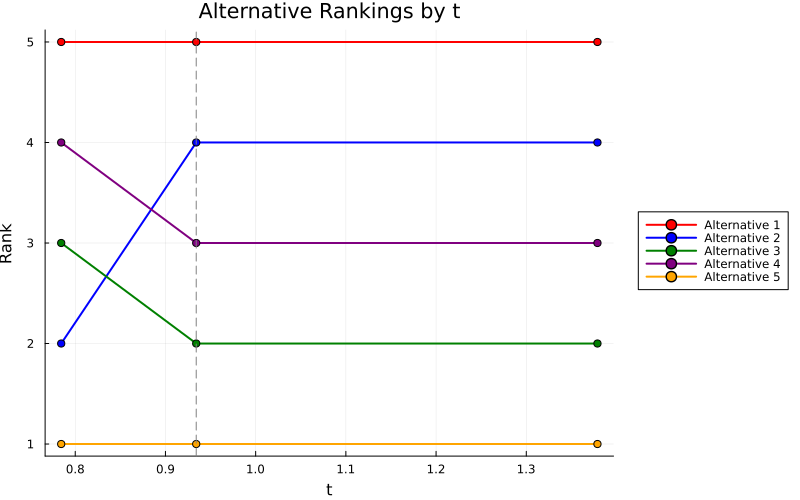

"/workspaces/Interval-AHP-alt-rank/src/rank_changes_plot.png"

In [13]:
# 6. 順位変化の可視化（オプション）
using Plots

function plot_rank_changes(results)
    t_points = sort(collect(keys(results.rankings)))
    n = length(results.rankings[t_points[1]])
    
    p = plot(
        xlabel = "t",
        ylabel = "Rank",
        title = "Alternative Rankings by t",
        legend = :outerright,
        size = (800, 500),
        grid = true
    )
    
    colors = [:red, :blue, :green, :purple, :orange]
    
    for alt in 1:n
        # 各代替案の順位の変化を追跡
        ranks = [findfirst(x -> x == alt, results.rankings[t]) for t in t_points]
        plot!(p, t_points, ranks, 
              label = "Alternative $alt", 
              marker = :circle,
              color = colors[alt],
              linewidth = 2)
    end
    
    # 変化点を縦線で表示
    for cp in results.change_points
        vline!(p, [cp], linestyle = :dash, color = :gray, label = nothing)
    end
    
    return p
end

rank_plot = plot_rank_changes(results)
display(rank_plot)
savefig(rank_plot, "rank_changes_plot.png")